In [73]:
import pandas as pd
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt

In [74]:
data = pd.read_csv('data/final_data.csv')

In [75]:
data

,Unnamed: 0,Date,Country,Energy_MoM,Food_MoM,Total_MoM,core_MoM,exchange_rate,unemployment_rate,gdp_growth_MoM,Open,High,Low,Close,Adj Close,Volume,interest_rate
0,3348,1990-01-01,Canada,6.139425,6.139425,6.139425,6.139425,123.20,7.9,0.251825,-0.918546,-0.921429,-0.918294,-0.919191,-0.920197,-0.976826,12.290
1,3349,1990-01-01,France,4.145839,4.145839,4.145839,4.145839,109.44,9.5,0.066095,NaN,NaN,NaN,NaN,NaN,NaN,10.000
2,3350,1990-01-01,Germany,3.641039,3.641039,3.641039,3.641039,103.45,NaN,0.454281,-1.110363,-1.114522,-1.105487,-1.110181,-1.110181,-1.098172,7.700
3,3351,1990-01-01,Italy,7.385644,7.385644,7.385644,7.385644,115.38,9.1,0.118321,NaN,NaN,NaN,NaN,NaN,NaN,13.500
4,3352,1990-01-01,Japan,3.088895,3.088895,3.088895,3.088895,118.48,2.2,0.193677,2.636594,2.613194,2.635150,2.635704,2.635704,-0.668867,4.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2844,6192,2023-11-01,Germany,2.043916,2.043916,2.043916,2.043916,100.84,3.1,0.205760,2.107083,2.098489,2.122315,2.109371,2.109371,0.643591,4.500
2845,6193,2023-11-01,Italy,-3.664127,-3.664127,-3.664127,-3.664127,99.73,7.5,0.044213,0.395618,0.392295,0.394090,0.389620,0.389620,0.999393,4.500
2846,6194,2023-11-01,Japan,0.869017,0.869017,0.869017,0.869017,67.48,2.5,0.035238,2.192060,2.195978,2.204129,2.218074,2.218074,1.735910,-0.100
2847,6195,2023-11-01,United Kingdom,0.375000,0.375000,0.375000,0.375000,105.90,3.8,0.117019,1.275816,1.289956,1.280888,1.290770,1.290770,0.971050,5.250


In [76]:
test = data[data["Date"] >= "1999-01"]

In [77]:
test

,Unnamed: 0,Date,Country,Energy_MoM,Food_MoM,Total_MoM,core_MoM,exchange_rate,unemployment_rate,gdp_growth_MoM,Open,High,Low,Close,Adj Close,Volume,interest_rate
756,4104,1999-01-01,Canada,-0.168728,-0.168728,-0.168728,-0.168728,87.77,7.9,0.410390,-0.399794,-0.398558,-0.395413,-0.393188,-0.392736,-0.126509,5.000
757,4105,1999-01-01,France,-0.811664,-0.811664,-0.811664,-0.811664,106.71,12.0,0.190679,0.051455,0.074289,0.024718,0.054210,0.054210,-0.954599,3.000
758,4106,1999-01-01,Germany,-0.862288,-0.862288,-0.862288,-0.862288,106.14,8.9,0.292188,-0.374021,-0.363563,-0.364942,-0.358856,-0.358856,-1.098172,3.000
759,4107,1999-01-01,Italy,0.074091,0.074091,0.074091,0.074091,100.41,11.1,0.177175,1.115255,1.104331,1.128144,1.115971,1.115971,-1.624648,3.000
760,4108,1999-01-01,Japan,-0.512911,-0.512911,-0.512911,-0.512911,139.24,4.5,0.277821,0.066137,0.081634,0.075549,0.076072,0.076072,-0.668867,0.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2844,6192,2023-11-01,Germany,2.043916,2.043916,2.043916,2.043916,100.84,3.1,0.205760,2.107083,2.098489,2.122315,2.109371,2.109371,0.643591,4.500
2845,6193,2023-11-01,Italy,-3.664127,-3.664127,-3.664127,-3.664127,99.73,7.5,0.044213,0.395618,0.392295,0.394090,0.389620,0.389620,0.999393,4.500
2846,6194,2023-11-01,Japan,0.869017,0.869017,0.869017,0.869017,67.48,2.5,0.035238,2.192060,2.195978,2.204129,2.218074,2.218074,1.735910,-0.100
2847,6195,2023-11-01,United Kingdom,0.375000,0.375000,0.375000,0.375000,105.90,3.8,0.117019,1.275816,1.289956,1.280888,1.290770,1.290770,0.971050,5.250


In [78]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load Data
df = test.copy()

# Convert 'Date' to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Set Multi-Index (Date, Country)
df.set_index(["Date", "Country"], inplace=True)

# Handle missing values
df = df.groupby(level="Country").ffill().interpolate()

# Standardize numerical variables (Z-score normalization)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)

# Convert to Wide Format (Each country gets separate columns)
df_wide = df_scaled.unstack(level="Country")

# Prepare Time-Series Data for PyMC
Y = df_wide.values  # Convert DataFrame to NumPy array
n_obs, n_vars = Y.shape  # Number of time points, number of variables

print(f"Shape of data for PyMC: {Y.shape}")  # (T, N)


Shape of data for PyMC: (299, 105)


In [79]:
def get_zscore_delta(feature, country, raw_delta, df_wide, scaler, df_columns):
    """
    Convert a raw delta (e.g. +0.25% interest rate) into a z-score delta
    based on the original scaler fitted to df, not df_wide.
    """
    # Get index of the feature in original df (no country dimension)
    idx = df_columns.get_loc(feature)  # df.columns, NOT df_wide.columns
    std = np.sqrt(scaler.var_[idx])
    return raw_delta / std


In [80]:
import pymc as pm

# Number of lags
p = 3  

# Prepare lagged dataset for VAR
X = np.hstack([Y[i:n_obs - p + i] for i in range(p)])  # Lagged inputs
Y_target = Y[p:]  # Target values

# Define Bayesian VAR Model
with pm.Model() as bvar_model:
    beta = pm.Normal("beta", mu=0, sigma=1, shape=(n_vars, p * n_vars))
    sigma = pm.HalfCauchy("sigma", beta=1, shape=n_vars)

    mu = pm.math.dot(X, beta.T)
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y_target)

    # Sample from posterior (use more samples later for real runs)
    trace = pm.sample(
        200, tune=100, chains=1, cores=1,
        target_accept=0.9, return_inferencedata=True
    )

print("✅ Model trained.")



Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [beta, sigma]


/opt/anaconda3/envs/ds/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for Jupyter
support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 1 chain for 100 tune and 200 draw iterations (100 + 200 draws total) took 37 seconds.
There were 186 divergences after tuning. Increase `target_accept` or reparameterize.
Chain 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Only one chain was sampled, this makes it impossible to run some convergence checks


✅ Model trained.


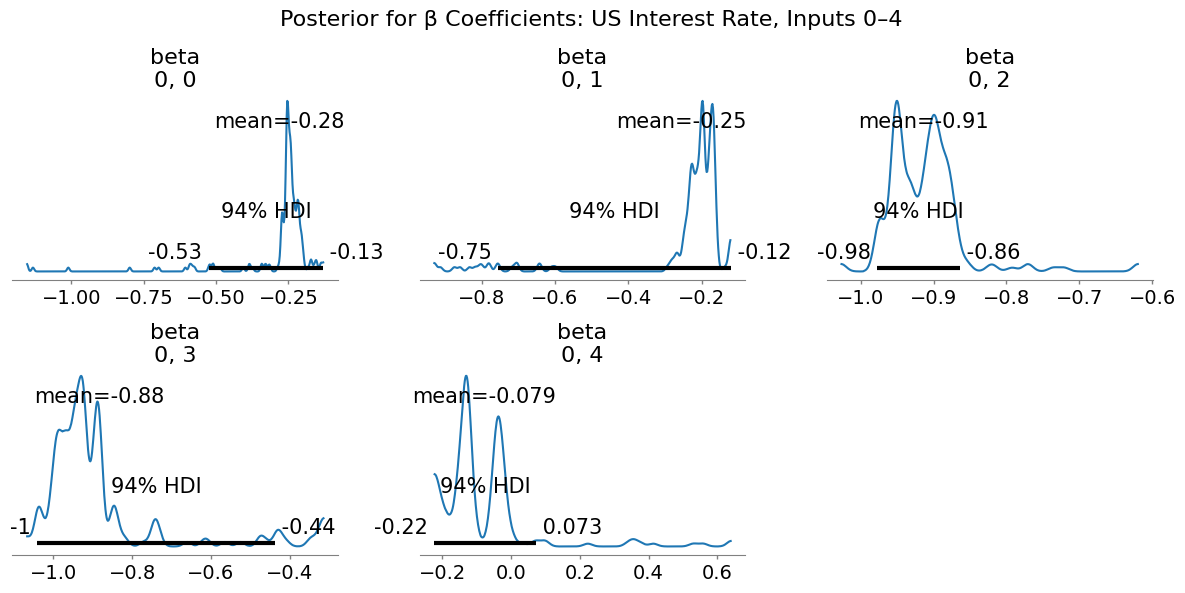

In [81]:
import arviz as az
import matplotlib.pyplot as plt

# Plot posterior distribution for one row of beta (e.g., for interest_rate_US)
az.plot_posterior(
    trace,
    var_names=["beta"],
    coords={"beta_dim_0": [0], "beta_dim_1": list(range(0, 5))},
    figsize=(12, 6)
)
plt.suptitle("Posterior for β Coefficients: US Interest Rate, Inputs 0–4", fontsize=16)
plt.tight_layout()
plt.show()



In [82]:
def invert_standardization(z_array, feature, df_columns, scaler):
    idx = df_columns.get_loc(feature)
    mean = scaler.mean_[idx]
    std = np.sqrt(scaler.var_[idx])
    return z_array * std + mean


In [83]:
def run_forecast_with_shocks(Y, beta, n_forecast, p, df_wide_columns, shock_schedule=None):
    forecast_results = []
    last_obs = Y[-p:].copy()

    for step in range(n_forecast):
        lag_vector = last_obs[::-1].flatten()

        # 🧨 Apply user-defined shocks
        if shock_schedule and step in shock_schedule:
            for (var, country), delta in shock_schedule[step].items():
                idx = df_wide_columns.get_loc((var, country))
                lag_vector[idx] += delta

        forecast = lag_vector @ beta.T
        forecast_results.append(forecast)
        last_obs = np.vstack([last_obs[1:], forecast])

    return np.vstack(forecast_results)


In [97]:
def inverse_transform_forecast(forecast_array, df_wide, scaler, original_columns):
    """
    Convert forecasted z-scores back to real-world units using the fitted StandardScaler.
    
    Parameters:
    - forecast_array: numpy array of shape (n_forecast_steps, n_variables)
    - df_wide: wide-format DataFrame (with MultiIndex columns)
    - scaler: StandardScaler fitted on long-form df
    - original_columns: df.columns (used to match feature names)
    
    Returns:
    - DataFrame with the same structure as df_wide, but real-world values
    """
    inverse_array = np.empty_like(forecast_array)
    
    for i, (var, country) in enumerate(df_wide.columns):
        # Get original index for feature (e.g., 'interest_rate')
        original_idx = original_columns.get_loc(var)
        std = np.sqrt(scaler.var_[original_idx])
        mean = scaler.mean_[original_idx]

        # Reverse standardization
        inverse_array[:, i] = forecast_array[:, i] * std + mean

    return pd.DataFrame(inverse_array, index=forecast_dates, columns=df_wide.columns)


In [85]:
# Example: interest rate in US increases over 6 months
shock_schedule = {
    0: {
        ("interest_rate", "United States"): get_zscore_delta(
            "interest_rate", "United States", 0.25, df_wide, scaler, df.columns
        )
    },
    1: {
        ("interest_rate", "United States"): get_zscore_delta(
            "interest_rate", "United States", 0.25, df_wide, scaler, df.columns
        )
    },
    3: {
        ("interest_rate", "United States"): get_zscore_delta(
            "interest_rate", "United States", 0.5, df_wide, scaler, df.columns
        )
    }
}



n_forecast = 6
beta_mean = trace.posterior["beta"].mean(dim=["chain", "draw"]).values
forecast_array = run_forecast_with_shocks(
    Y, beta_mean, n_forecast, p, df_wide.columns, shock_schedule
)


In [86]:
# Format forecast
last_date = df.index.get_level_values("Date")[-1]
forecast_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=n_forecast, freq="M")
forecast_df = pd.DataFrame(forecast_array, index=forecast_dates, columns=df_wide.columns)

print("📈 Forecast:")
display(forecast_df)


📈 Forecast:


/var/folders/sh/s_xv2d8x6kv1_qyc9qgmkv300000gn/T/ipykernel_3484/1849586824.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=n_forecast, freq="M")


Unnamed: 0                                                     \
Country         Canada       France      Germany        Italy       Japan   
2023-12-31    1.468555     1.608581     1.798411     1.770258    1.633140   
2024-01-31    2.186007     0.398891     2.345038     2.826577   -0.714760   
2024-02-29   -8.186933     5.165785     9.282920    -6.282469    5.484596   
2024-03-31  -28.803455    50.790630    14.222986   -29.396384  -10.155327   
2024-04-30   97.913472   270.940792  -332.790824  -615.314677 -270.617240   
2024-05-31 -757.983142  6400.680262  1071.428570 -6397.996915  945.799775   

                                          Energy_MoM                           \
Country    United Kingdom United States       Canada       France     Germany   
2023-12-31       1.764346      1.643809     0.156600     0.712728    0.505681   
2024-01-31       1.092480      2.401879    -2.712585    -1.362921    0.790430   
2024-02-29      10.667899     -6.410007   -12.614475    -1.543397   -4.465906   
2024-03-31      87.701950     13.281785   -73.324961    79.797372   28.121826   
2024-04-30    -181.414701    201.467403  -336.333238    54.563532  672.234408   
2024-05-31    2137.955079  -1681.873193 -1373.438712 -1526.748119 -134.715836   

            ...      Volume                              interest_rate  \
Country     ...       Japan United Kingdom United States        Canada   
2023-12-31  ...    0.134787      -0.779508      3.957580      1.400770   
2024-01-31  ...   -0.870290       1.291896      2.238404      2.555211   
2024-02-29  ...   15.930171     -12.343655     11.860724      2.251883   
2024-03-31  ...  -88.673903     -46.757566    -38.990325    -62.078001   
2024-04-30  ...  -32.751731     -43.276553   -482.663891   -888.659543   
2024-05-31  ... -381.190070    1646.186213   3375.256849  -3196.391875   

                                                                             \
Country          France     Germany       Italy        Japan United Kingdom   
2023-12-31     1.524158    1.299761    1.323267    -0.899095       1.777669   
2024-01-31     0.366113    1.622121    2.194330    -0.588065       4.363589   
2024-02-29    14.355679    2.936439   -0.391497     1.736143      -0.261497   
2024-03-31   -59.800724  -74.269195   49.227163   -77.209730      38.521322   
2024-04-30  -511.258832 -260.748887 -631.223681   290.459984    -156.982551   
2024-05-31 -4842.931992 -532.664559 -773.751049 -7516.693708   -2733.984905   

                          
Country    United States  
2023-12-31      2.119884  
2024-01-31      3.468573  
2024-02-29     15.017355  
2024-03-31    -76.567816  
2024-04-30    502.155159  
2024-05-31   3540.306262  

[6 rows x 105 columns]

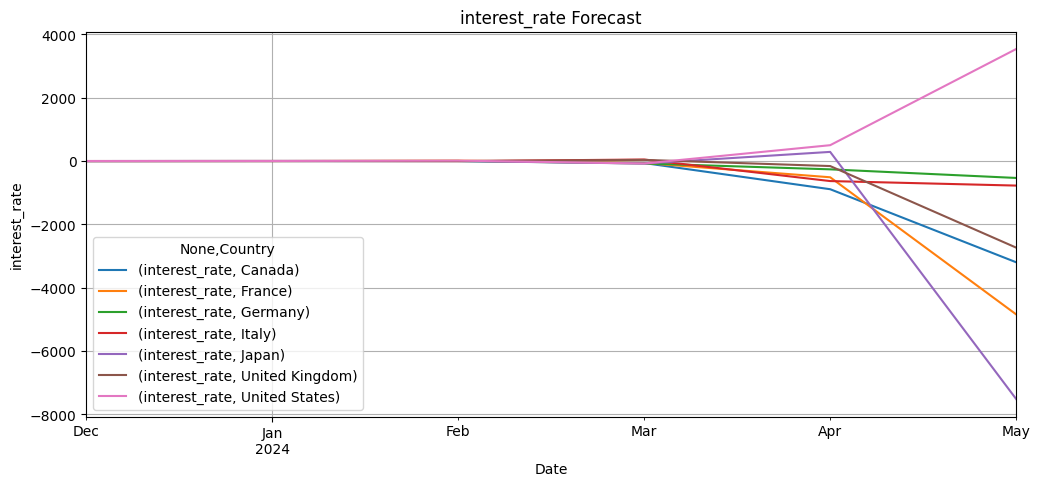

In [87]:
# Plot forecast for a specific variable
var_to_plot = "interest_rate"
cols = [col for col in forecast_df.columns if col[0] == var_to_plot]

forecast_df[cols].plot(figsize=(12, 5), title=f"{var_to_plot} Forecast")
plt.xlabel("Date")
plt.ylabel(var_to_plot)
plt.grid(True)
plt.show()


<Axes: title={'center': 'US Interest Rate: Baseline vs Shock'}>

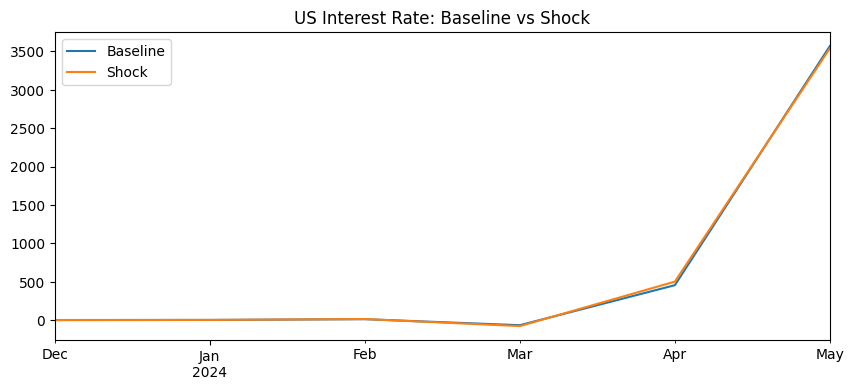

In [88]:
baseline = run_forecast_with_shocks(Y, beta_mean, 6, p, df_wide.columns)
shock = run_forecast_with_shocks(Y, beta_mean, 6, p, df_wide.columns, shock_schedule)

baseline_df = pd.DataFrame(baseline, index=forecast_dates, columns=df_wide.columns)
shock_df = pd.DataFrame(shock, index=forecast_dates, columns=df_wide.columns)

(
    baseline_df[("interest_rate", "United States")].rename("Baseline")
    .to_frame()
    .join(shock_df[("interest_rate", "United States")].rename("Shock"))
    .plot(title="US Interest Rate: Baseline vs Shock", figsize=(10, 4))
)


<Axes: title={'center': 'Forecasted Interest Rate (United States)'}>

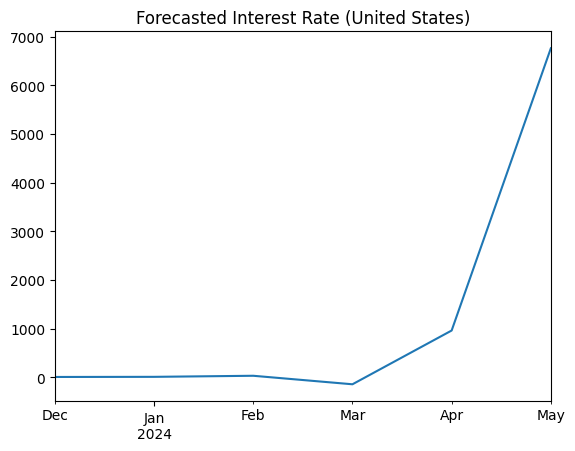

In [89]:
# Get scaler info
idx = df.columns.get_loc("interest_rate")
mean = scaler.mean_[idx]
std = np.sqrt(scaler.var_[idx])

# Convert z-score series back to raw %
z_series = forecast_df[("interest_rate", "United States")]
interest_rate_real = z_series * std + mean

interest_rate_real.plot(title="Forecasted Interest Rate (United States)")


In [90]:
forecast_df[("interest_rate", "United States")]

2023-12-31       2.119884
2024-01-31       3.468573
2024-02-29      15.017355
2024-03-31     -76.567816
2024-04-30     502.155159
2024-05-31    3540.306262
Freq: ME, Name: (interest_rate, United States), dtype: float64

In [91]:
interest_rate_real

2023-12-31       5.835587
2024-01-31       8.412168
2024-02-29      30.475347
2024-03-31    -144.492024
2024-04-30     961.119684
2024-05-31    6765.305059
Freq: ME, Name: (interest_rate, United States), dtype: float64

In [92]:
real_rates = invert_standardization(forecast_df[("interest_rate", "United States")], "interest_rate", df.columns, scaler)
real_rates


2023-12-31       5.835587
2024-01-31       8.412168
2024-02-29      30.475347
2024-03-31    -144.492024
2024-04-30     961.119684
2024-05-31    6765.305059
Freq: ME, Name: (interest_rate, United States), dtype: float64

In [93]:
def run_fan_chart_forecasts(trace, Y, p, df_wide_columns, n_forecast=6, n_samples=100):
    # Stack chains and draws into one axis: (sample, output_var, input_var)
    beta_samples = trace.posterior["beta"].stack(sample=("chain", "draw")).transpose("sample", "beta_dim_0", "beta_dim_1")
    beta_array = beta_samples.values  # shape: (n_samples_total, n_output_vars, p * n_input_vars)

    # Randomly sample from posterior
    sample_indices = np.random.choice(beta_array.shape[0], size=n_samples, replace=False)

    forecasts = []
    for i in sample_indices:
        beta_i = beta_array[i]
        forecast_i = run_forecast_with_shocks(
            Y, beta_i, n_forecast, p, df_wide_columns
        )
        forecasts.append(forecast_i)

    return np.stack(forecasts)  # shape: (n_samples, n_forecast, n_vars)


In [94]:
def plot_fan_chart_for_variable(
    fan_forecasts, forecast_dates, df_wide, variable, country, credible_intervals=[10, 25, 75, 90]
):
    idx = df_wide.columns.get_loc((variable, country))
    samples = fan_forecasts[:, :, idx]

    percentiles = np.percentile(samples, credible_intervals + [50], axis=0)
    
    plt.fill_between(forecast_dates, percentiles[0], percentiles[3], alpha=0.3, label="10–90%")
    plt.fill_between(forecast_dates, percentiles[1], percentiles[2], alpha=0.5, label="25–75%")
    plt.plot(forecast_dates, percentiles[4], color="blue", label="Median Forecast")
    plt.title(f"{country} – {variable} Forecast (Fan Chart)")
    plt.grid(True)
    plt.legend()
    plt.show()


/var/folders/sh/s_xv2d8x6kv1_qyc9qgmkv300000gn/T/ipykernel_3484/737115283.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=df.index.get_level_values("Date")[-1] + pd.DateOffset(months=1), periods=6, freq="M")


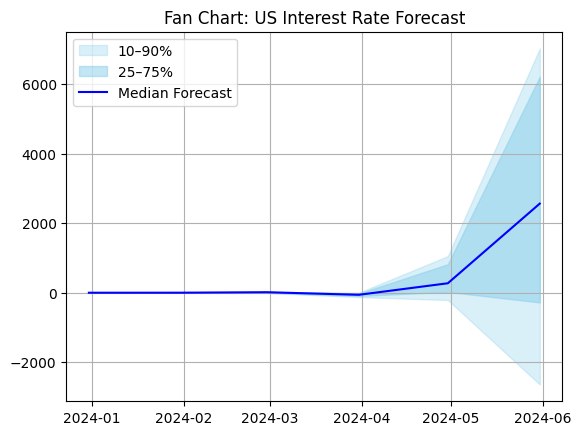

In [95]:
fan_forecasts = run_fan_chart_forecasts(trace, Y, p, df_wide.columns, n_forecast=6, n_samples=100)

# Extract fan chart for interest rate US
idx = df_wide.columns.get_loc(("interest_rate", "United States"))
samples = fan_forecasts[:, :, idx]  # shape: (100, 6)

# Plot percentiles
forecast_dates = pd.date_range(start=df.index.get_level_values("Date")[-1] + pd.DateOffset(months=1), periods=6, freq="M")
percentiles = np.percentile(samples, [10, 25, 50, 75, 90], axis=0)

plt.fill_between(forecast_dates, percentiles[0], percentiles[4], color="skyblue", alpha=0.3, label="10–90%")
plt.fill_between(forecast_dates, percentiles[1], percentiles[3], color="skyblue", alpha=0.5, label="25–75%")
plt.plot(forecast_dates, percentiles[2], label="Median Forecast", color="blue")
plt.title("Fan Chart: US Interest Rate Forecast")
plt.legend()
plt.grid(True)
plt.show()


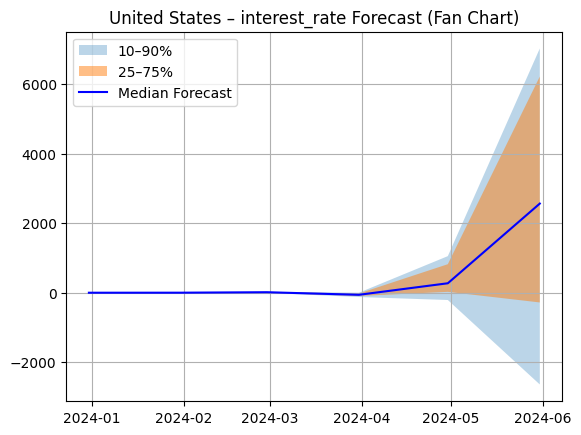

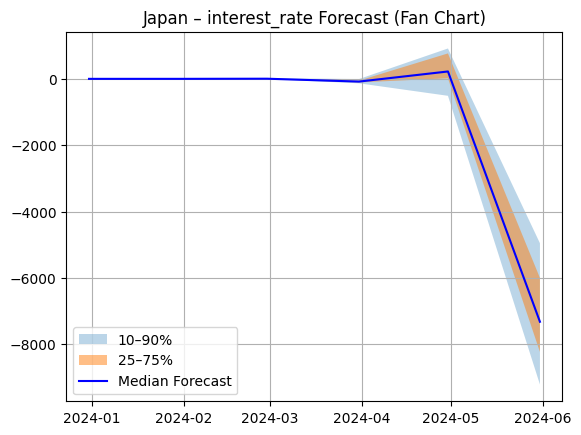

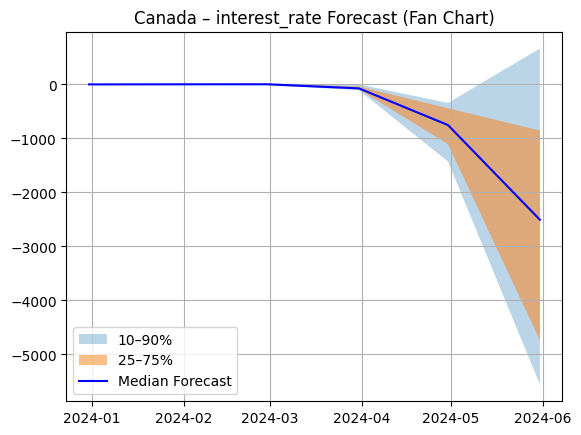

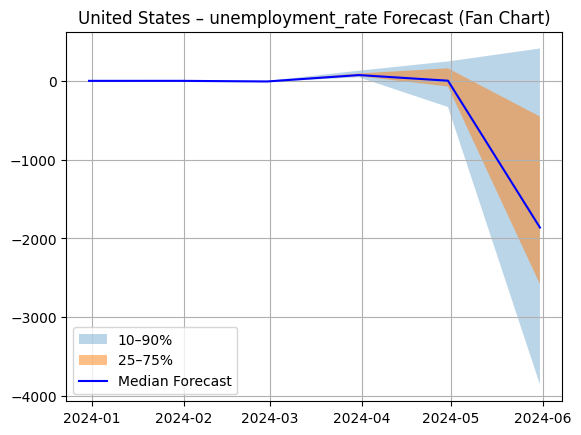

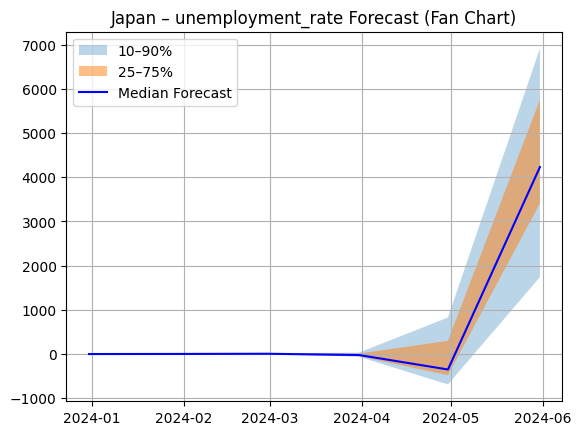

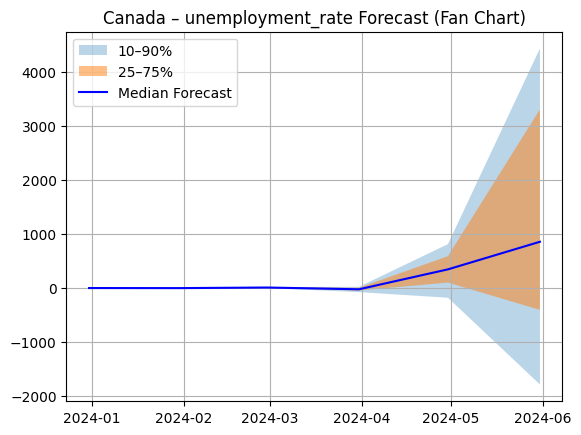

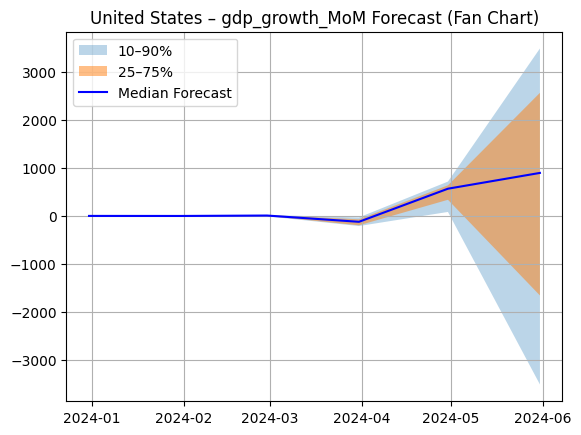

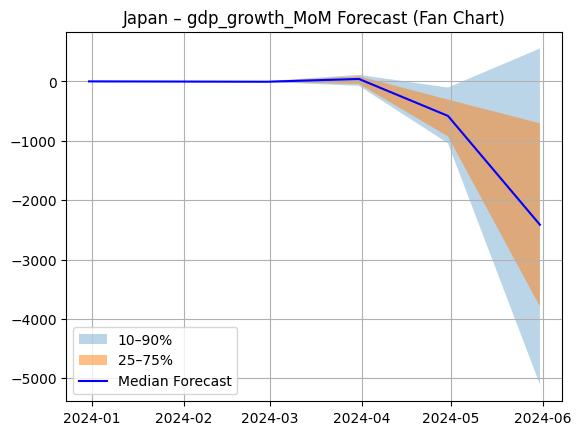

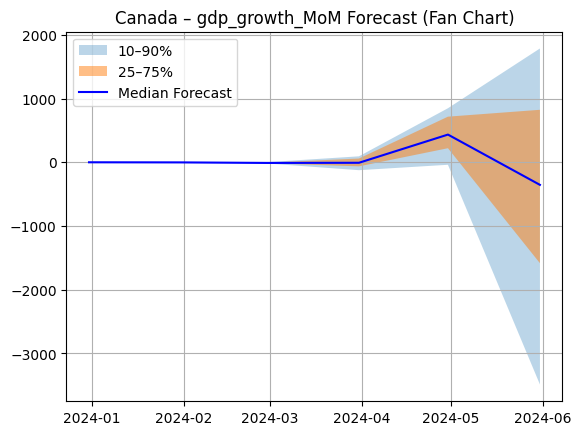

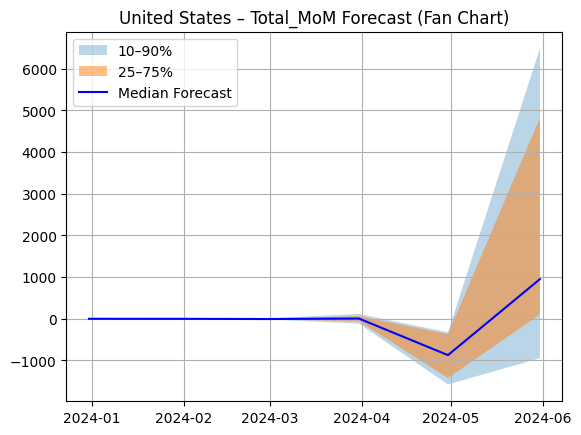

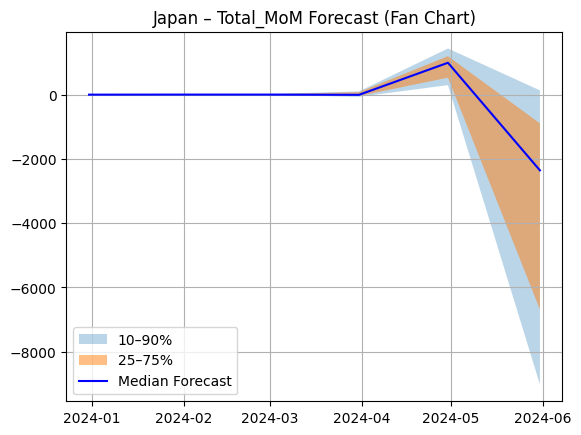

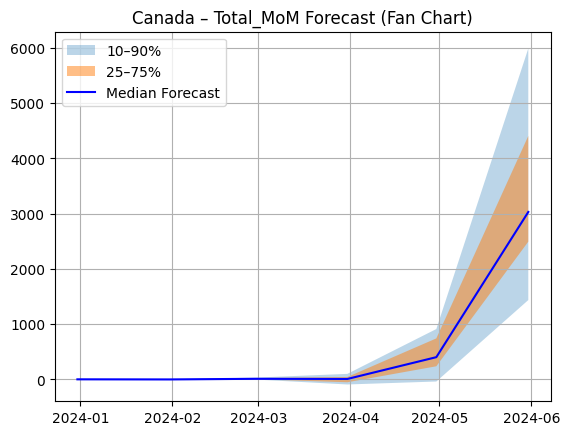

In [96]:
macro_vars = ["interest_rate", "unemployment_rate", "gdp_growth_MoM", "Total_MoM"]
countries = ["United States", "Japan", "Canada"]

for var in macro_vars:
    for country in countries:
        plot_fan_chart_for_variable(fan_forecasts, forecast_dates, df_wide, var, country)


In [98]:
real_forecast_df = inverse_transform_forecast(
    forecast_array,
    df_wide=df_wide,
    scaler=scaler,
    original_columns=df.columns
)


In [100]:
real_forecast_df[("interest_rate", "United States")]



2023-12-31       5.835587
2024-01-31       8.412168
2024-02-29      30.475347
2024-03-31    -144.492024
2024-04-30     961.119684
2024-05-31    6765.305059
Freq: ME, Name: (interest_rate, United States), dtype: float64

In [101]:
real_forecast_df[("gdp_growth_MoM", "Japan")]

2023-12-31      0.179664
2024-01-31     -0.522972
2024-02-29     -0.802594
2024-03-31      4.319424
2024-04-30   -134.242457
2024-05-31   -390.938330
Freq: ME, Name: (gdp_growth_MoM, Japan), dtype: float64

In [102]:
forecast_median = fan_forecasts.mean(axis=0)
real_fan_median = inverse_transform_forecast(forecast_median, df_wide, scaler, df.columns)


In [103]:
real_fan_median

Unnamed: 0                                             \
Country            Canada        France        Germany         Italy   
2023-12-31    6031.766699  6.129773e+03    6234.567074  6.220707e+03   
2024-01-31    6328.950951  5.461655e+03    6660.027793  6.814421e+03   
2024-02-29     960.225416  8.183360e+03   11459.126943  3.077072e+03   
2024-03-31  -20054.264580  3.530784e+04   19921.132792 -5.646952e+03   
2024-04-30   54099.329413  1.576519e+05 -177817.179296 -3.420040e+05   
2024-05-31 -481206.408146  3.865230e+06  962370.673642 -3.668207e+06   

                                                          Energy_MoM  \
Country             Japan United Kingdom  United States       Canada   
2023-12-31    6138.816649   6.214251e+03    6142.517399     3.456008   
2024-01-31    4845.319040   5.843483e+03    6558.025817    -6.884379   
2024-02-29    8548.131634   1.117520e+04    1245.003266   -37.395773   
2024-03-31   -2589.309104   5.603008e+04   11646.863939  -273.483157   
2024-04-30 -203929.491884  -1.593292e+05  112698.439354 -1284.958704   
2024-05-31  192360.507267   1.242983e+06 -993484.814453 -4626.406908   

                                      ...      Volume                 \
Country          France      Germany  ...       Japan United Kingdom   
2023-12-31     5.073158     4.386244  ...    0.760455      -0.029086   
2024-01-31    -2.527203     4.940330  ...   -0.389046       2.432113   
2024-02-29    -4.217636   -10.385327  ...   12.028118      -7.810920   
2024-03-31   280.353021    85.470258  ...  -89.802901     -18.425771   
2024-04-30    -3.050555  2511.464118  ... -155.310582     111.629004   
2024-05-31 -8442.290260  -936.335724  ... -949.953253    2568.312734   

                         interest_rate                                        \
Country    United States        Canada       France     Germany        Italy   
2023-12-31      4.526534      4.404915     4.669604    4.240557     4.282087   
2024-01-31      2.838279      7.436611     2.895562    5.155540     6.604370   
2024-02-29     14.111257      7.553312    29.166403    9.823361    -0.651578   
2024-03-31    -37.437822   -114.120697   -88.326413 -113.050232    72.731621   
2024-04-30   -413.703953  -1491.559134  -917.811856 -231.784172 -1172.416083   
2024-05-31   3440.744900  -4958.034691 -8263.324957 -384.394806 -2036.497545   

                                                       
Country            Japan United Kingdom United States  
2023-12-31      0.050989       5.171940      5.816404  
2024-01-31      1.064855      10.398257      8.003849  
2024-02-29      9.737952       0.239911     26.765840  
2024-03-31   -139.187569      68.598860   -113.667956  
2024-04-30    547.214416    -256.808758    685.882480  
2024-05-31 -13720.941094   -4650.393556   5044.630257  

[6 rows x 105 columns]